In [1]:
# Importing the required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model, Sequential
import numpy as np
from tensorflow.keras.preprocessing import image

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_path = "Dog Breed Classification/train"
test_path = "Dog Breed Classification/test"

In [ ]:
# Create data generators for training and testing data
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# Load training and testing data using the data generator
train = train_gen.flow_from_directory(train_path,
                                      target_size=(299,299),
                                      batch_size=32,
                                      class_mode='categorical')

test = test_gen.flow_from_directory(test_path,
                                    target_size=(299,299),
                                    batch_size=32,
                                    class_mode='categorical')

Found 6726 images belonging to 99 classes.
Found 928 images belonging to 99 classes.


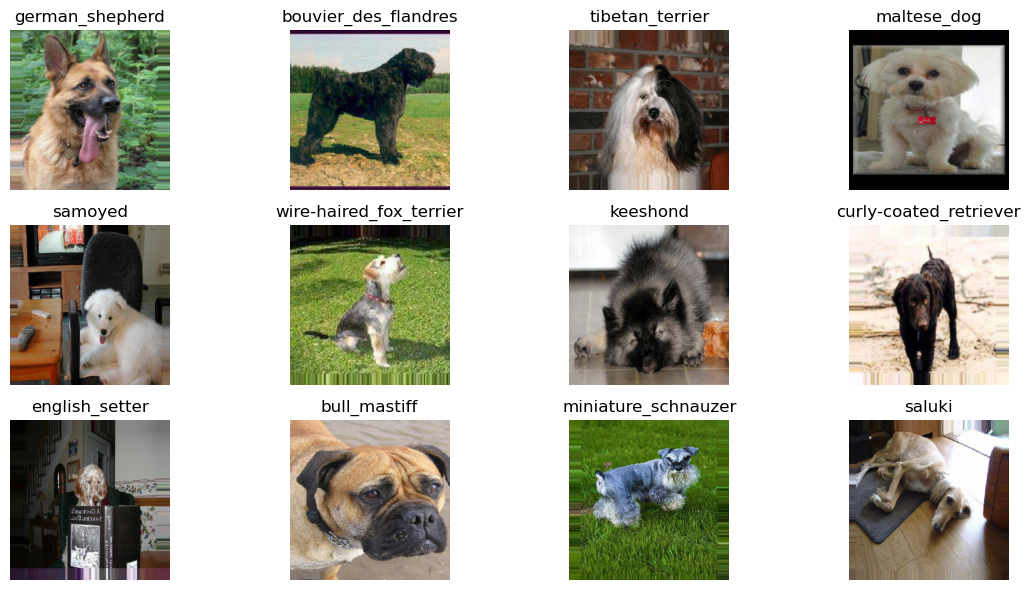

In [5]:
# Visualizing sample images from the dataset

# Retrieve a batch of images and their labels
sample_images, labels = next(train)  

# Get the mapping of class indices to class names
class_names = train.class_indices  

plt.figure(figsize=(12, 6))

# Display the first 12 images
for i in range(12):  
    plt.subplot(3, 4, i+1)
    plt.imshow(sample_images[i])
    plt.title(list(class_names.keys())[list(class_names.values()).index(labels[i].argmax())])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Load InceptionV3 pre trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

In [7]:
# Build Model using pre trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(99, activation='softmax'))

In [8]:
# Train model with existing weights
for layer in base_model.layers:
  print(layer)

In [9]:
# Freeze the base model layers
print("Number of trainable weights before freezing the base layer: ", len(model.trainable_weights))
model.layers[0].trainable = False
print("Number of trainable weights after freezing the base layer: ", len(model.trainable_weights))

Number of trainable weights before freezing the base layer:  194
Number of trainable weights after freezing the base layer:  6


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 99)                50787     
                                                        

In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
# Train the model
model.fit(train,epochs=10,validation_data=test,steps_per_epoch=len(train),validation_steps=len(test))

Epoch 1/10
211/211 [==============================] - 621s 3s/step - loss: 1.1741 - accuracy: 0.7202 - val_loss: 0.3584 - val_accuracy: 0.8976
Epoch 2/10
211/211 [==============================] - 616s 3s/step - loss: 0.4300 - accuracy: 0.8712 - val_loss: 0.3465 - val_accuracy: 0.9030
Epoch 3/10
211/211 [==============================] - 611s 3s/step - loss: 0.3812 - accuracy: 0.8864 - val_loss: 0.3240 - val_accuracy: 0.9084
Epoch 4/10
211/211 [==============================] - 611s 3s/step - loss: 0.3131 - accuracy: 0.9041 - val_loss: 0.3423 - val_accuracy: 0.9170
Epoch 5/10
211/211 [==============================] - 608s 3s/step - loss: 0.3016 - accuracy: 0.9093 - val_loss: 0.3432 - val_accuracy: 0.9009
Epoch 6/10
211/211 [==============================] - 576s 3s/step - loss: 0.2747 - accuracy: 0.9130 - val_loss: 0.3115 - val_accuracy: 0.9149
Epoch 7/10
211/211 [==============================] - 577s 3s/step - loss: 0.2457 - accuracy: 0.9214 - val_loss: 0.3264 - val_accuracy: 0.9030

In [13]:
model.save('DogBreeds.h5')

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Evaluating the model
loss, accuracy = model.evaluate(test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

29/29 [==============================] - 68s 2s/step - loss: 0.3221 - accuracy: 0.9019
Test Loss: 0.3220541477203369
Test Accuracy: 0.9019396305084229


In [15]:
# List of trained breeds
breeds = list(train.class_indices.keys())

1/1 [==============================] - 1s 752ms/step
40


'german_shepherd'

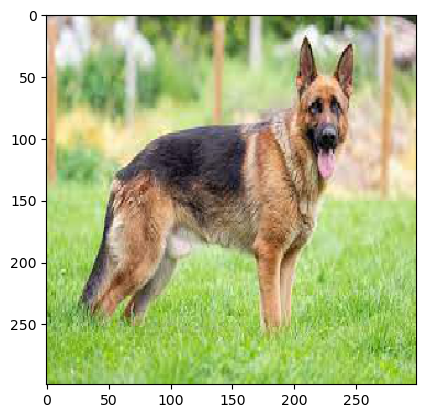

In [16]:
# Testing 1
img = image.load_img('German Shepard.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0) 
#Normalize the image
img /= 255.0 
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

In [17]:
# Testing 2
img = image.load_img('golden-retriever 4.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)
#Normalize the image
img /= 255.0 
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 103ms/step
42


'golden_retriever'

In [33]:
# Testing 3
img = image.load_img('labrador-retriever1.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 76ms/step
57


'labrador_retriever'

1/1 [==============================] - 0s 108ms/step
1


'Dachshund'

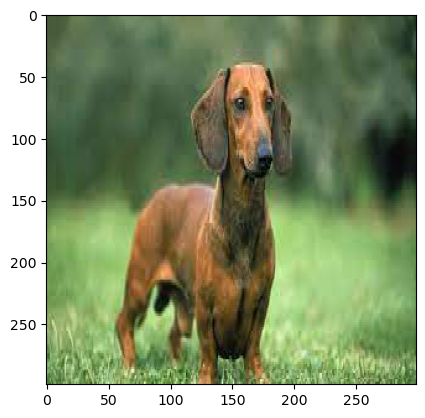

In [19]:
# Testing 4
img = image.load_img('duchshund1.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 83ms/step
11


'beagle'

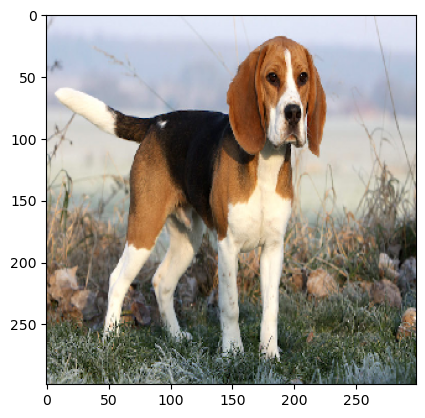

In [34]:
# Testing 5
img = image.load_img('beagle1.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 100ms/step
0


'Boxer'

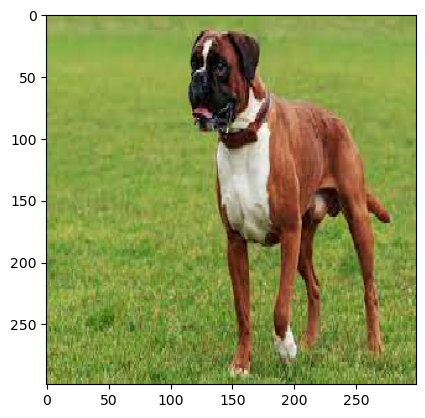

In [21]:
# Testing 6
img = image.load_img('boxer.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 82ms/step
30


'cocker_spaniel'

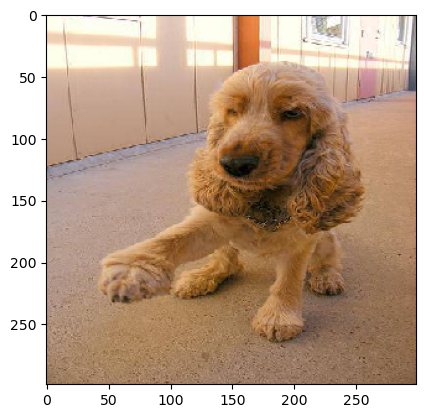

In [37]:
# Testing 7
img = image.load_img('cocker_spaniel63.jpg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 110ms/step
76


'pug'

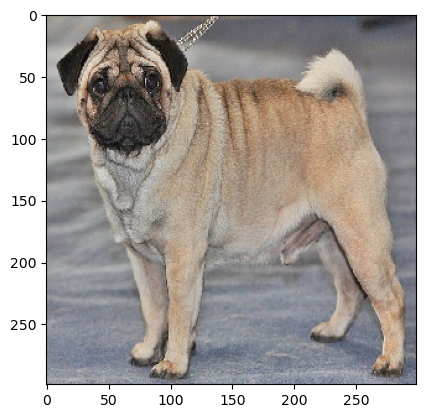

In [23]:
# Testing 8
img = image.load_img('pug.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

In [24]:
# Testing 9
img = image.load_img('Rottweiler-dog.webp',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 101ms/step
79


'rottweiler'

In [25]:
# Testing 10
img = image.load_img('doberman.jpg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 105ms/step
35


'doberman'

1/1 [==============================] - 0s 113ms/step
44


'great_dane'

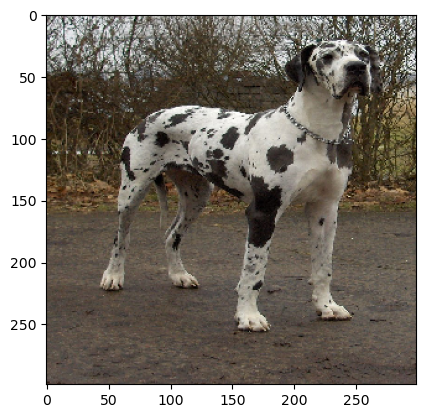

In [26]:
# Testing 11
img = image.load_img('great dane.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 107ms/step
75


'pomeranian'

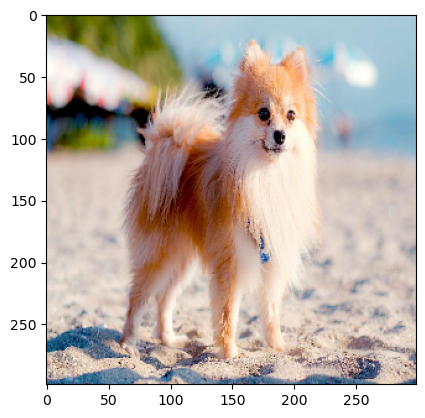

In [27]:
# Testing 12
img = image.load_img('Pomeranian.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 97ms/step
2


'Dalmatian'

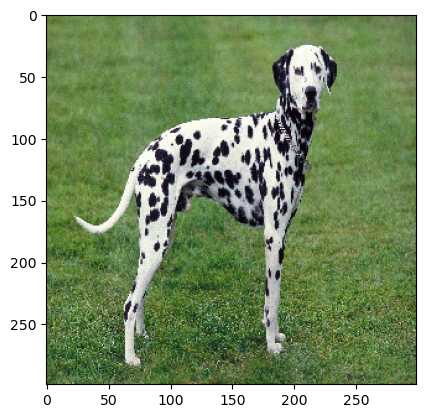

In [28]:
# Testing 13
img = image.load_img('Dalmatian-dog.webp',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 91ms/step
3


'Indian Spitz'

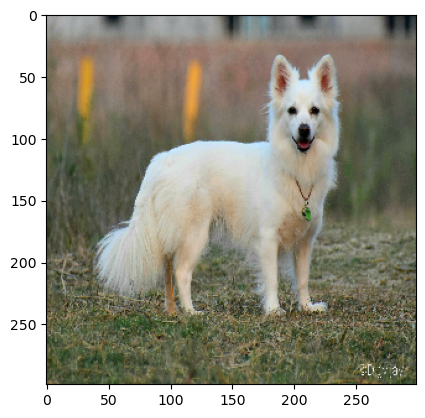

In [29]:
# Testing 14
img = image.load_img('Indian_Spitz_Dog.jpg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 101ms/step
91


'tibetan_mastiff'

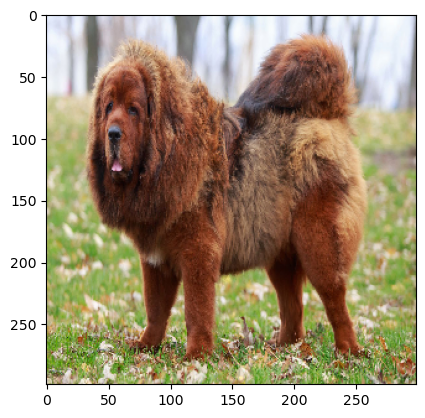

In [30]:
# Testing 15
img = image.load_img('Tibetan Mastiff.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 115ms/step
5


'Siberian husky'

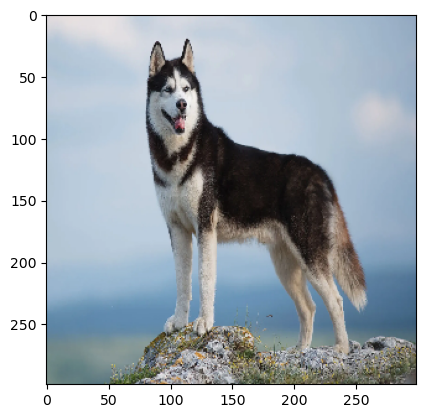

In [31]:
# Testing 16
img = image.load_img('Siberian-Husky-dog.webp',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]

1/1 [==============================] - 0s 103ms/step
4


'Shis Tzu'

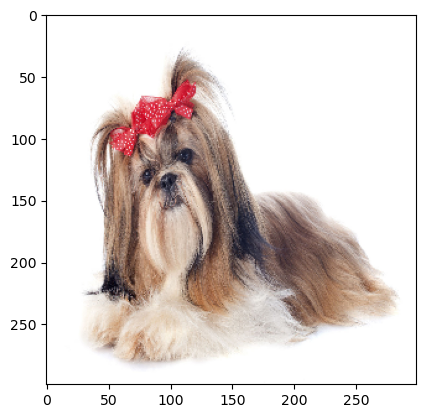

In [32]:
# Testing 17
img = image.load_img('ShihTzu.jpeg',target_size = (299,299))
# Display image
plt.imshow(img)
img = image.img_to_array(np.squeeze(img))
# Add an extra dimension to match the model's input shape
img = np.expand_dims(img, axis=0)  
#Normalize the image
img /= 255.0
pred = np.argmax(model.predict(img))
print(pred)
breeds[pred]